In [29]:
# Gerekli kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Veri setini yüklüyoruz
data = pd.read_csv('C:/Users/ayyld/Desktop/MachineLearning/DataSet.txt', delimiter='\t', header=None)

# Sütun adlarını ekliyoruz
data.columns = ["Gebelik", "Glikoz", "KanBasıncı", "CiltKalınlığı", "İnsülin", "VKI", "DiabetSoyAğacı", "Yaş", "Sonuç"]

# Belirli sütunlardaki sıfırları medyan değerlerle değiştiriyoruz
for column in ["Glikoz", "KanBasıncı", "CiltKalınlığı", "İnsülin", "VKI"]:
    data[column] = data[column].replace(0, np.nan)
    data[column] = data[column].fillna(data[column].median())

# Veriyi özellikler ve hedef değişken olarak ayırıyoruz
X = data.drop("Sonuç", axis=1)
y = data["Sonuç"]

# Özellikleri ölçeklendiriyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ROC Eğrisini çizmek için fonksiyon
def plot_roc_curve(fpr, tpr, roc_auc, title='ROC Eğrisi'):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Yanlış Pozitif Oranı')
    plt.ylabel('Doğru Pozitif Oranı')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()



Naive Bayes Sınıflandırıcısı:
[[119  32]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

Doğruluk: 0.7402597402597403


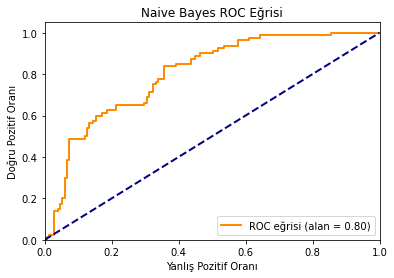

In [30]:
# Veriyi eğitim (%70) ve test (%30) olarak ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Naive Bayes Sınıflandırıcısı
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_pred_nb_proba = nb_model.predict_proba(X_test)[:, 1]

# Naive Bayes için metrikler
print("Naive Bayes Sınıflandırıcısı:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Doğruluk:", accuracy_score(y_test, y_pred_nb))

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb_proba)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plot_roc_curve(fpr_nb, tpr_nb, roc_auc_nb, title='Naive Bayes ROC Eğrisi')




K-Nearest Neighbors Sınıflandırıcısı:
En iyi k: 13
[[126  25]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231

Doğruluk: 0.7489177489177489


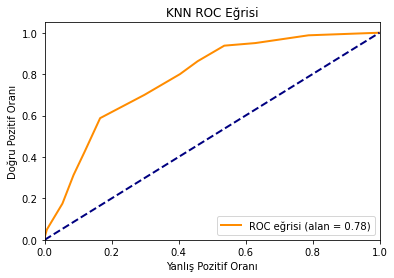

In [25]:
# K-Nearest Neighbors Sınıflandırıcısı
k_degerleri = range(1, 21)
dogruluk_skorlari = []

for k in k_degerleri:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    dogruluk_skorlari.append(accuracy_score(y_test, y_pred_knn))

en_iyi_k = k_degerleri[dogruluk_skorlari.index(max(dogruluk_skorlari))]
knn_model = KNeighborsClassifier(n_neighbors=en_iyi_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_knn_proba = knn_model.predict_proba(X_test)[:, 1]

# KNN için metrikler
print("\nK-Nearest Neighbors Sınıflandırıcısı:")
print("En iyi k:", en_iyi_k)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Doğruluk:", accuracy_score(y_test, y_pred_knn))

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plot_roc_curve(fpr_knn, tpr_knn, roc_auc_knn, title='KNN ROC Eğrisi')



C:\Users\ayyld\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Multi-Layer Perceptron Sınıflandırıcısı:
[[120  31]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.57      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231

Doğruluk: 0.7186147186147186


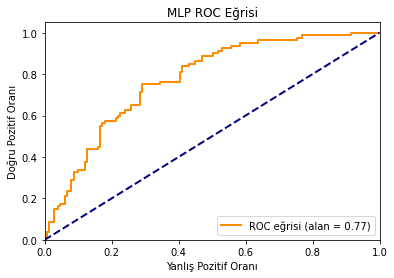

In [31]:
# Multi-Layer Perceptron Sınıflandırıcısı
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp_proba = mlp_model.predict_proba(X_test)[:, 1]

# MLP için metrikler
print("\nMulti-Layer Perceptron Sınıflandırıcısı:")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print("Doğruluk:", accuracy_score(y_test, y_pred_mlp))

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp_proba)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plot_roc_curve(fpr_mlp, tpr_mlp, roc_auc_mlp, title='MLP ROC Eğrisi')



Support Vector Machine Sınıflandırıcısı:
[[126  25]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Doğruluk: 0.7445887445887446


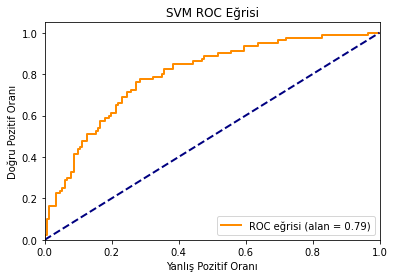

In [27]:
# Support Vector Machine Sınıflandırıcısı
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]

# SVM için metrikler
print("\nSupport Vector Machine Sınıflandırıcısı:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Doğruluk:", accuracy_score(y_test, y_pred_svm))

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plot_roc_curve(fpr_svm, tpr_svm, roc_auc_svm, title='SVM ROC Eğrisi')
